# 1. Install Dependencies and Setup

In [1]:
print("HELLO WORLD TESTING PYTHON")

HELLO WORLD TESTING PYTHON


In [2]:
!pip install tensorflow opencv-python matplotlib


[notice] A new release of pip is available: 23.3.1 -> 24.2
[notice] To update, run: python.exe -m pip install --upgrade pip


In [3]:
!pip list

Package                            Version
---------------------------------- -----------
absl-py                            2.0.0
alembic                            1.13.2
altair                             5.4.1
aniso8601                          9.0.1
asgiref                            3.7.2
astunparse                         1.6.3
attrs                              24.2.0
blinker                            1.8.2
cachetools                         5.3.1
certifi                            2023.7.22
charset-normalizer                 3.2.0
click                              8.1.7
cloudpickle                        3.0.0
cmake                              3.27.7
colorama                           0.4.6
contourpy                          1.1.1
cvlib                              0.2.7
cycler                             0.11.0
databricks-sdk                     0.31.0
Deprecated                         1.2.14
distlib                            0.3.6
Django                             4.2.


[notice] A new release of pip is available: 23.3.1 -> 24.2
[notice] To update, run: python.exe -m pip install --upgrade pip


In [14]:
import tensorflow as tf
import os

In [15]:
os.path.join('data','try') #os library is used to create file path in the appropriate form i.e windows or mac or linux 
#it creates it in appropriate form data is directory and try is file we wanna access in it
#cell not required just demonstrating

'data\\try'

# 2. Remove dodgy images

In [16]:
import cv2
import imghdr
from matplotlib import pyplot as plt

In [17]:
data_dir = 'data' 

In [18]:
image_exts = ['jpeg','jpg', 'bmp', 'png']

In [19]:
print(os.listdir(data_dir)) # it is just used to create a list of the data in the folder demonstrating the function here

['happy', 'sad']


In [20]:
img=cv2.imread(os.path.join(data_dir,'happy','_happy_jumping_on_beach-40815.jpg')) #demonstrating how cv2 can be used to see an image

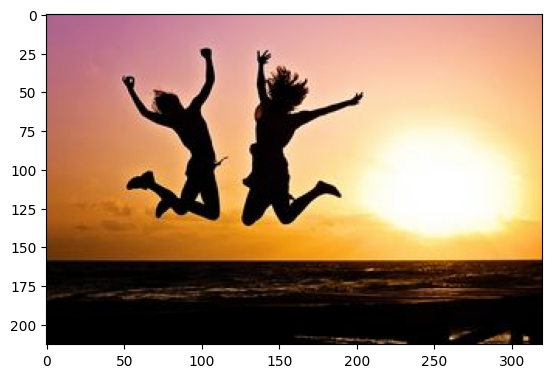

In [21]:
plt.imshow(cv2.cvtColor(img,cv2.COLOR_BGR2RGB)) #by default cv2 views images in bgr convert it to rgb
plt.show()

In [24]:
for image_class in os.listdir(data_dir): #removal of dodgy images who have different file extensions ext
    for image in os.listdir(os.path.join(data_dir, image_class)):
        image_path = os.path.join(data_dir, image_class, image)
        try: 
            img = cv2.imread(image_path)
            tip = imghdr.what(image_path)
            if tip not in image_exts: 
                print('Image not in ext list {}'.format(image_path))
                os.remove(image_path)
        except Exception as e: 
            print('Issue with image {}'.format(image_path))
            # os.remove(image_path)

Issue with image data\happy\.ipynb_checkpoints


# 3. Load Data

In [36]:
import numpy as np
from matplotlib import pyplot as plt

In [38]:
tf.keras.utils.image_dataset_from_directory??

Signature:
tf.keras.utils.image_dataset_from_directory(
    directory,
    labels='inferred',
    label_mode='int',
    class_names=None,
    color_mode='rgb',
    batch_size=32,
    image_size=(256, 256),
    shuffle=True,
    seed=None,
    validation_split=None,
    subset=None,
    interpolation='bilinear',
    follow_links=False,
    crop_to_aspect_ratio=False,
    pad_to_aspect_ratio=False,
    data_format=None,
    verbose=True,
)
Source:   
@keras_export(
    [
        "keras.utils.image_dataset_from_directory",
        "keras.preprocessing.image_dataset_from_directory",
    ]
)
def image_dataset_from_directory(
    directory,
    labels="inferred",
    label_mode="int",
    class_names=None,
    color_mode="rgb",
    batch_size=32,
    image_size=(256, 256),
    shuffle=True,
    seed=None,
    validation_split=None,
    subset=None,
    interpolation="bilinear",
    follow_links=False,
    crop_to_aspect_ratio=False,
    pad_to_aspect_ratio=False,
    data_format=None,
    ve

In [ ]:
# default batch size is 32 we can change batch sizes and image_size values 

In [71]:
data = tf.keras.utils.image_dataset_from_directory('data',batch_size=34) # this file can be used to directly load data and split them into classes and batches 

Found 306 files belonging to 2 classes.


In [72]:
len(data) #no of batches

9

In [73]:
data_iterator = data.as_numpy_iterator() #to create an interator to acess batches

In [74]:
batch = data_iterator.next() #every time we run this cell we access the next batch

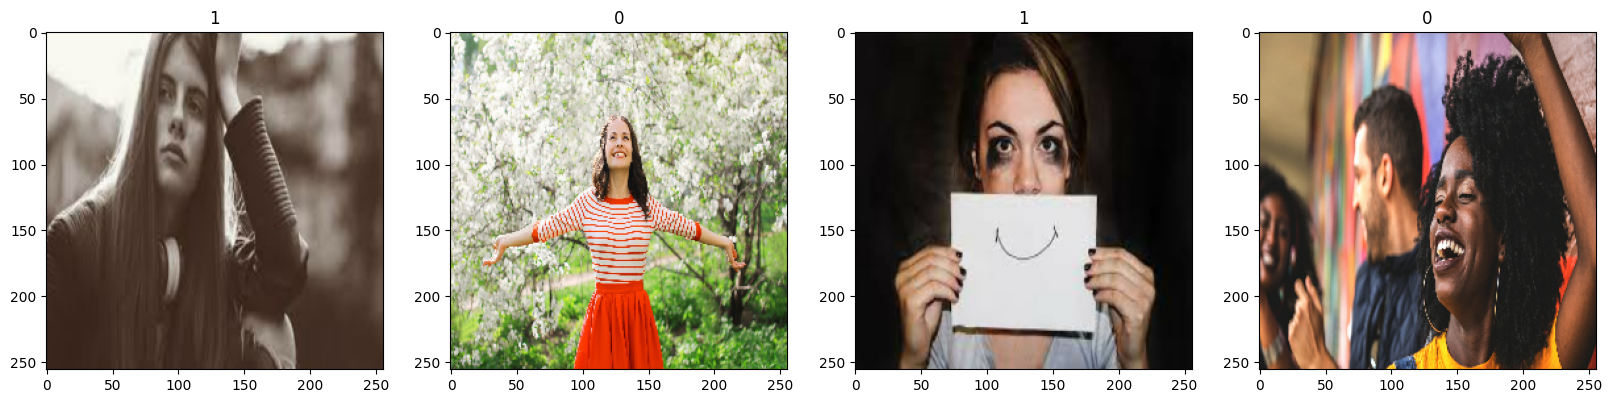

In [75]:
fig, ax = plt.subplots(ncols=4, figsize=(20,20))
for idx, img in enumerate(batch[0][:4]):
    ax[idx].imshow(img.astype(int))
    ax[idx].title.set_text(batch[1][idx]) # we can see by running this that label 0 is assigned to happy and label1 to sad

# 4. Scale Data

In [76]:
data = data.map(lambda x,y: (x/255, y)) #since image pixel sizes range between (0,256) we scale to bring it to (0,1) not the size of the image 
#which is aslo in this case 256x256 coincidentally 

In [54]:
data.as_numpy_iterator().next()

(array([[[[0.96862745, 0.96862745, 0.96862745],
          [0.96862745, 0.96862745, 0.96862745],
          [0.96862745, 0.96862745, 0.96862745],
          ...,
          [0.96862745, 0.96862745, 0.96862745],
          [0.96862745, 0.96862745, 0.96862745],
          [0.96862745, 0.96862745, 0.96862745]],
 
         [[0.96862745, 0.96862745, 0.96862745],
          [0.96862745, 0.96862745, 0.96862745],
          [0.96862745, 0.96862745, 0.96862745],
          ...,
          [0.96862745, 0.96862745, 0.96862745],
          [0.96862745, 0.96862745, 0.96862745],
          [0.96862745, 0.96862745, 0.96862745]],
 
         [[0.96862745, 0.96862745, 0.96862745],
          [0.96862745, 0.96862745, 0.96862745],
          [0.96862745, 0.96862745, 0.96862745],
          ...,
          [0.96862745, 0.96862745, 0.96862745],
          [0.96862745, 0.96862745, 0.96862745],
          [0.96862745, 0.96862745, 0.96862745]],
 
         ...,
 
         [[0.96862745, 0.96862745, 0.96862745],
          [0.96862

# 5. Split Data

In [66]:
train_size = int(len(data)*.7)
val_size = int(len(data)*.2)+1
test_size = int(len(data)*.1)+1

In [ ]:
#splitting data into batches intialising batch sizes since it should be in integers and int function is rounding test_size to 0 so we are adding 1
#and val_size is also added with 1 to utilise all the batches 6+2+1

In [67]:
len(data)

9

In [63]:
train_size

6

In [64]:
val_size

2

In [65]:
test_size

1

In [70]:
train = data.take(train_size) #take is used to select batches in this case 0 to train_size index
val = data.skip(train_size).take(val_size)#we skip the batches we selected in train and use next batches
test = data.skip(train_size+val_size).take(test_size)#similar to above step

# 6. Build Deep Learning Model

In [77]:
train

<_TakeDataset element_spec=(TensorSpec(shape=(None, 256, 256, 3), dtype=tf.float32, name=None), TensorSpec(shape=(None,), dtype=tf.int32, name=None))>

In [78]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Dense, Flatten, Dropout

In [79]:
model = Sequential()

In [80]:
model.add(Conv2D(16, (3,3), 1, activation='relu', input_shape=(256,256,3)))
model.add(MaxPooling2D())
model.add(Conv2D(32, (3,3), 1, activation='relu'))
model.add(MaxPooling2D())
model.add(Conv2D(16, (3,3), 1, activation='relu'))
model.add(MaxPooling2D())
model.add(Flatten())
model.add(Dense(256, activation='relu'))
model.add(Dense(1, activation='sigmoid'))

C:\Users\ADARSH\ImageClassification\imageclassification\Lib\site-packages\keras\src\layers\convolutional\base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [81]:
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                      │ (None, 254, 254, 16)        │             448 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d (MaxPooling2D)         │ (None, 127, 127, 16)        │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_1 (Conv2D)                    │ (None, 125, 125, 32)        │           4,640 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_1 (MaxPooling2D)       │ (None, 62, 62, 32)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_2 (Conv2D)                    │ (None, 60, 60, 16)          │           4,624 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_2 (MaxPooling2D)       │ (None, 30, 30, 16)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten (Flatten)                    │ (None, 14400)               │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ (None, 256)                 │       3,686,656 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 1)                   │             257 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 3,696,625 (14.10 MB)

 Trainable params: 3,696,625 (14.10 MB)

 Non-trainable params: 0 (0.00 B)

In [83]:
# in the first line of the above cell code we introduce a convolution layer with 16 filters (3,3) sized and since it is the starting layer
# it acts as input layer so input shape is (256,256,3) 3 here stands for RGB since it is the shape of numpy array of images created
#pooling layer is used to half the no of inputs and with every convolution layer we see a slight decrease in input size
#flatten is used to convert that 3d array to 1d 30*30*16 before passing it to dense layer

In [84]:
model.compile('adam', loss=tf.losses.BinaryCrossentropy(), metrics=['accuracy']) #adam is optimiser BinaryCrossentropy is loss function

# 7. Train

In [85]:
logdir='logs'

In [86]:
tensorboard_callback = tf.keras.callbacks.TensorBoard(log_dir=logdir)

In [87]:
hist = model.fit(train, epochs=20, validation_data=val, callbacks=[tensorboard_callback])

Epoch 1/20
6/6 ━━━━━━━━━━━━━━━━━━━━ 7s 536ms/step - accuracy: 0.4727 - loss: 1.1310 - val_accuracy: 0.5294 - val_loss: 0.6941
Epoch 2/20
6/6 ━━━━━━━━━━━━━━━━━━━━ 4s 561ms/step - accuracy: 0.4301 - loss: 0.6998 - val_accuracy: 0.5147 - val_loss: 0.6661
Epoch 3/20
6/6 ━━━━━━━━━━━━━━━━━━━━ 4s 581ms/step - accuracy: 0.5812 - loss: 0.6393 - val_accuracy: 0.8382 - val_loss: 0.5978
Epoch 4/20
6/6 ━━━━━━━━━━━━━━━━━━━━ 4s 617ms/step - accuracy: 0.7251 - loss: 0.5899 - val_accuracy: 0.8088 - val_loss: 0.5095
Epoch 5/20
6/6 ━━━━━━━━━━━━━━━━━━━━ 4s 524ms/step - accuracy: 0.8393 - loss: 0.4676 - val_accuracy: 0.7941 - val_loss: 0.4039
Epoch 6/20
6/6 ━━━━━━━━━━━━━━━━━━━━ 3s 569ms/step - accuracy: 0.8396 - loss: 0.4096 - val_accuracy: 0.9265 - val_loss: 0.2744
Epoch 7/20
6/6 ━━━━━━━━━━━━━━━━━━━━ 3s 487ms/step - accuracy: 0.9172 - loss: 0.3045 - val_accuracy: 0.9412 - val_loss: 0.2354
Epoch 8/20
6/6 ━━━━━━━━━━━━━━━━━━━━ 4s 617ms/step - accuracy: 0.9356 - loss: 0.2141 - val_accuracy: 0.8971 - val_loss:

# 8. Plot Performance

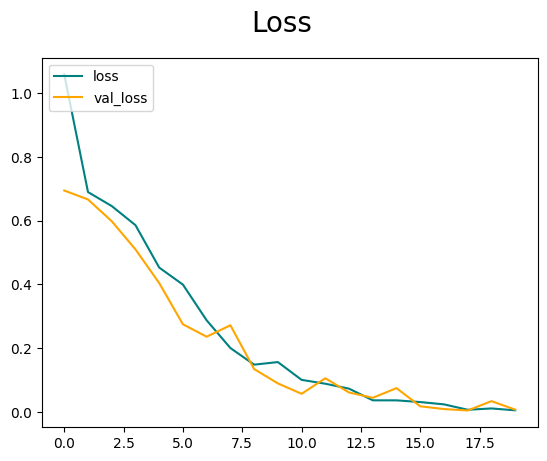

In [90]:
fig = plt.figure()
plt.plot(hist.history['loss'], color='teal', label='loss')
plt.plot(hist.history['val_loss'], color='orange', label='val_loss')
fig.suptitle('Loss', fontsize=20)
plt.legend(loc="upper left")
plt.show()

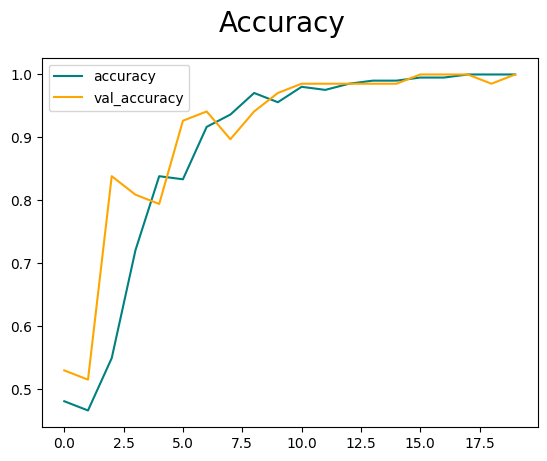

In [91]:
fig = plt.figure()
plt.plot(hist.history['accuracy'], color='teal', label='accuracy')
plt.plot(hist.history['val_accuracy'], color='orange', label='val_accuracy')
fig.suptitle('Accuracy', fontsize=20)
plt.legend(loc="upper left")
plt.show()

# 9. Evaluate

In [92]:
from tensorflow.keras.metrics import Precision, Recall, BinaryAccuracy

In [93]:
pre = Precision()
re = Recall()
acc = BinaryAccuracy()

In [94]:
for batch in test.as_numpy_iterator(): # to go through multiple batches in this case there is only 1 
    X, y = batch
    yhat = model.predict(X)
    pre.update_state(y, yhat) #yhat is predicted value and y is true value
    re.update_state(y, yhat)
    acc.update_state(y, yhat)

2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 122ms/step


In [97]:
print(pre.result().numpy(), re.result().numpy(), acc.result().numpy())

1.0 1.0 1.0


# 10. Test

In [98]:
import cv2

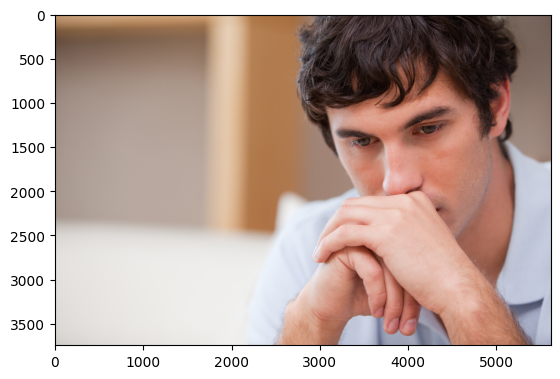

In [112]:
img = cv2.imread('8iAb9k4aT.jpg') #testing our model if it is predicting correctly using a random image
plt.imshow(cv2.cvtColor(img,cv2.COLOR_BGR2RGB))
plt.show()

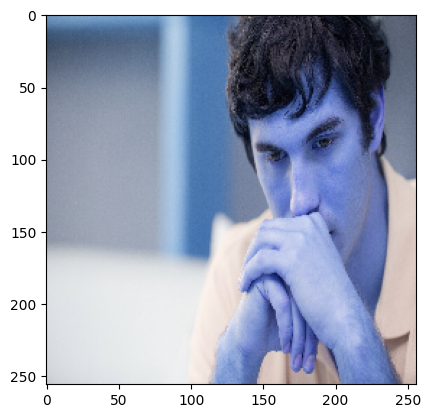

In [113]:
resize = tf.image.resize(img, (256,256))
plt.imshow(resize.numpy().astype(int))
plt.show()

In [109]:
yhat = model.predict(np.expand_dims(resize/255, 0))

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 51ms/step


In [110]:
yhat

array([[0.9995365]], dtype=float32)

In [114]:
if yhat > 0.5: 
    print(f'Predicted class is Sad')
else:
    print(f'Predicted class is Happy')

Predicted class is Sad


# 11. Save the Model

In [115]:
from tensorflow.keras.models import load_model

In [116]:
model.save(os.path.join('models','imageclassifier.h5'))

In [117]:
new_model = load_model(os.path.join('models','imageclassifier.h5'))

In [118]:
new_model.predict(np.expand_dims(resize/255, 0))

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 166ms/step


array([[0.9995365]], dtype=float32)

In [ ]:
print("YOU understood everything about this model don't have to mug it up